In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
df = pd.read_csv('./data/sleep_stage_info.csv')

In [4]:
mini_list = [995]

In [5]:
mini_df = df[df['patient_id'].isin(mini_list)]

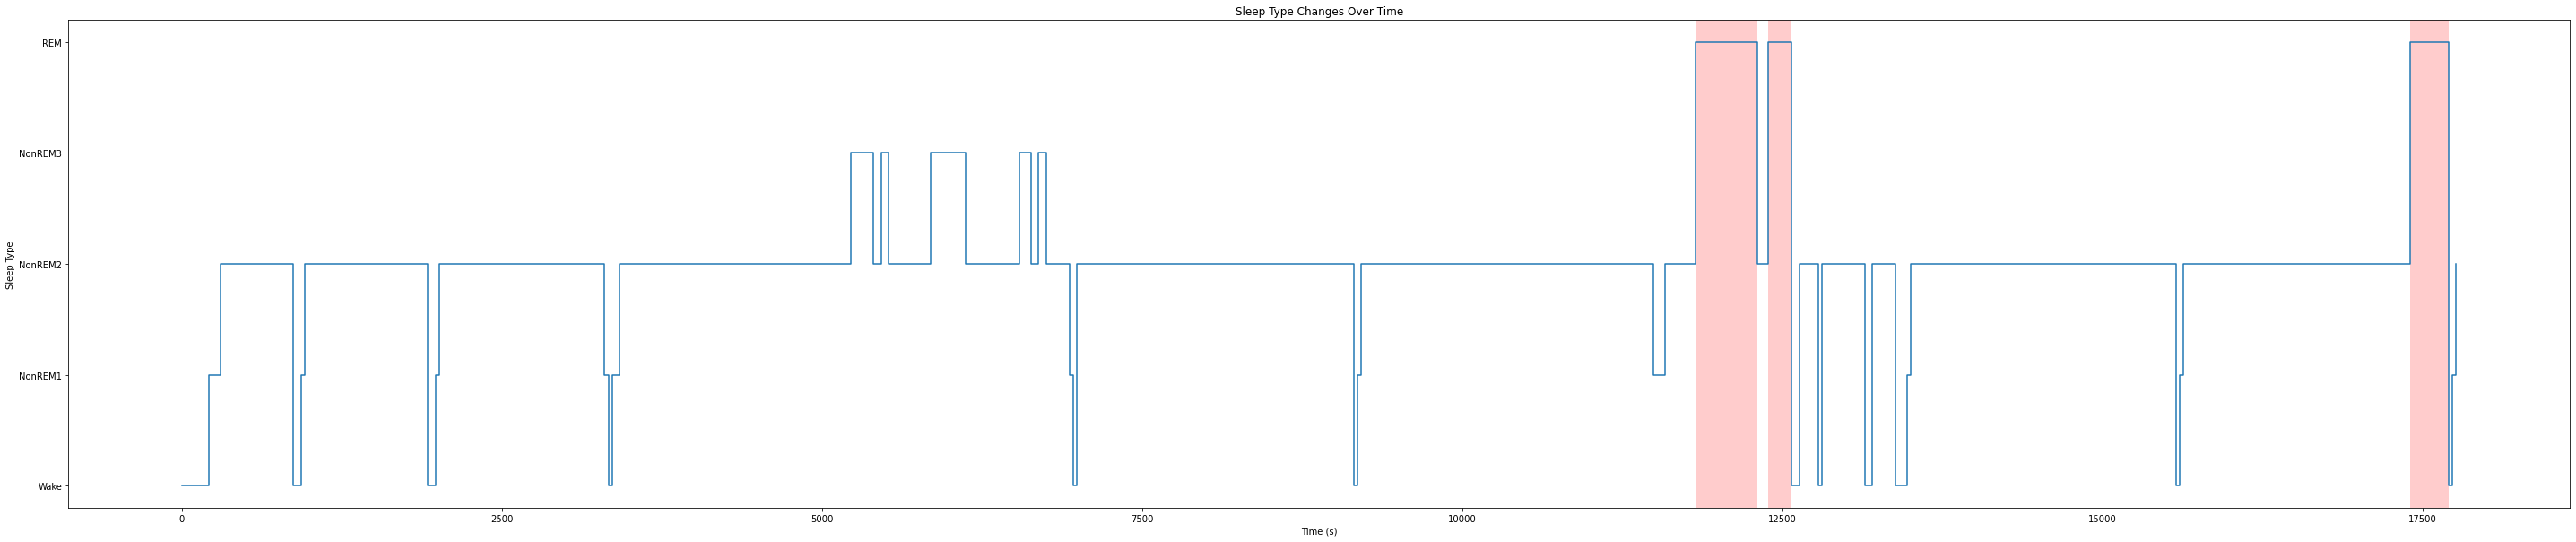

In [6]:
# visualize sleep type changes over time step plot
# highlight REM sleep stages

plt.figure(figsize=(50, 10))
plt.step(mini_df['stage_start_time'], mini_df['stage_type'], where='post')
plt.xlabel('Time (s)')
plt.ylabel('Sleep Type')
plt.title('Sleep Type Changes Over Time')

plt.axvspan(11820, 12300, facecolor='red', alpha=0.2)
plt.axvspan(12390, 12570, facecolor='red', alpha=0.2)
plt.axvspan(17400, 17700, facecolor='red', alpha=0.2)

plt.show()


In [2]:
list_df = pd.read_csv('./data/peak_algorithm_mini.csv')

In [3]:
list_df

,sliced_audio_file_id,peak_algorithm,patient_id
0,00000995_01_000_000,0,995
1,00000995_01_000_001,6,995
2,00000995_01_000_002,0,995
3,00000995_01_000_003,0,995
4,00000995_01_000_004,7,995
...,...,...,...
3265,00000999_05_127_025,6,999
3266,00000999_05_127_026,10,999
3267,00000999_05_127_027,7,999
3268,00000999_05_127_028,2,999


In [5]:
random_idxs = np.random.choice(list_df.shape[0], 5, replace=False)

list_df.iloc[random_idxs]

,sliced_audio_file_id,peak_algorithm,patient_id
161,00000995_01_005_065,5,995
585,00000995_02_017_000,5,995
1528,00000995_04_042_178,5,995
424,00000995_01_012_082,6,995
1484,00000995_04_042_134,6,995
2915,00000999_04_101_017,1,999
1376,00000995_04_042_026,7,995
2638,00000999_03_088_010,1,999
1467,00000995_04_042_117,6,995
330,00000995_01_009_000,7,995


In [ ]:
random_idxs = np.random.choice(list_df.shape[0], 5, replace=False)

list_df.iloc[random_idxs]

,sliced_audio_file_id,peak_algorithm,patient_id
161,00000995_01_005_065,5,995
585,00000995_02_017_000,5,995
1528,00000995_04_042_178,5,995
424,00000995_01_012_082,6,995
1484,00000995_04_042_134,6,995
2915,00000999_04_101_017,1,999
1376,00000995_04_042_026,7,995
2638,00000999_03_088_010,1,999
1467,00000995_04_042_117,6,995
330,00000995_01_009_000,7,995


In [8]:
list_df = list_df[list_df['patient_id'].isin(mini_list)]

In [9]:
time_idx = [x for x in range(0, 17880, 10)]

In [10]:
len(time_idx)

1788

In [11]:
list_df['time_idx'] = time_idx

In [12]:
list_df

,sliced_audio_file_id,peak_algorithm,patient_id,time_idx
0,00000995_01_000_000,0,995,0
1,00000995_01_000_001,6,995,10
2,00000995_01_000_002,0,995,20
3,00000995_01_000_003,0,995,30
4,00000995_01_000_004,7,995,40
...,...,...,...,...
1783,00000995_05_049_007,5,995,17830
1784,00000995_05_049_008,7,995,17840
1785,00000995_05_049_009,6,995,17850
1786,00000995_05_049_010,7,995,17860


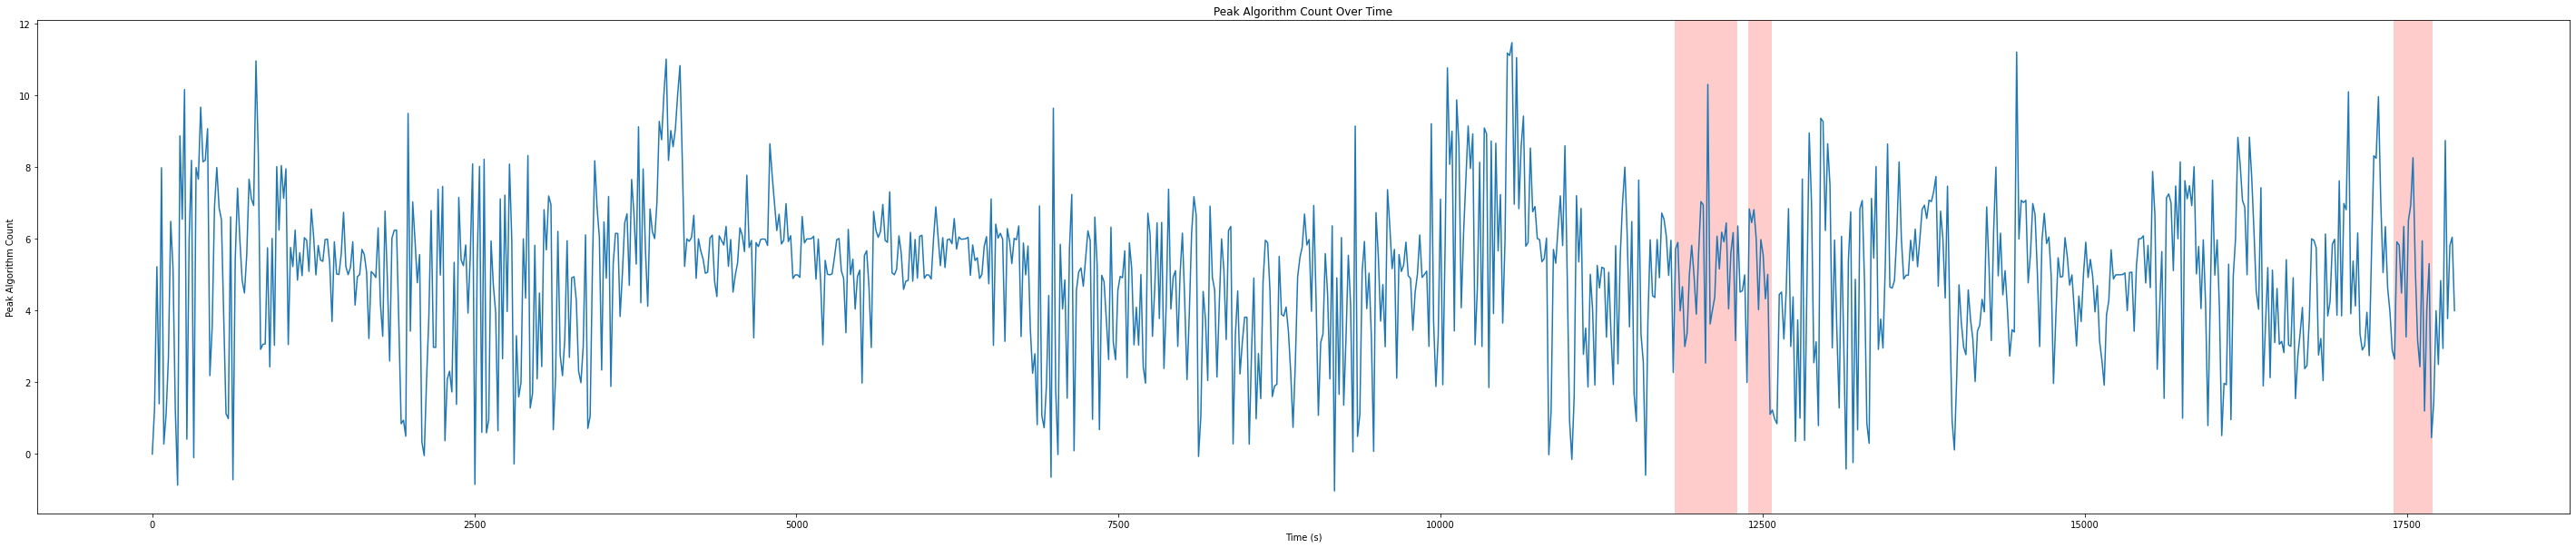

In [13]:
# visualize peak_algorithm counts over time

from scipy.interpolate import make_interp_spline, BSpline

spl = make_interp_spline(list_df['time_idx'], list_df['peak_algorithm'], k=3)  # type: BSpline
xnew = np.linspace(list_df['time_idx'].min(), list_df['time_idx'].max(), 1000)
ynew = spl(xnew)

plt.figure(figsize=(50, 10))
plt.plot(xnew, ynew)
plt.xlabel('Time (s)')
plt.ylabel('Peak Algorithm Count')
plt.title('Peak Algorithm Count Over Time')

plt.axvspan(11820, 12300, facecolor='red', alpha=0.2)
plt.axvspan(12390, 12570, facecolor='red', alpha=0.2)
plt.axvspan(17400, 17700, facecolor='red', alpha=0.2)

plt.show()

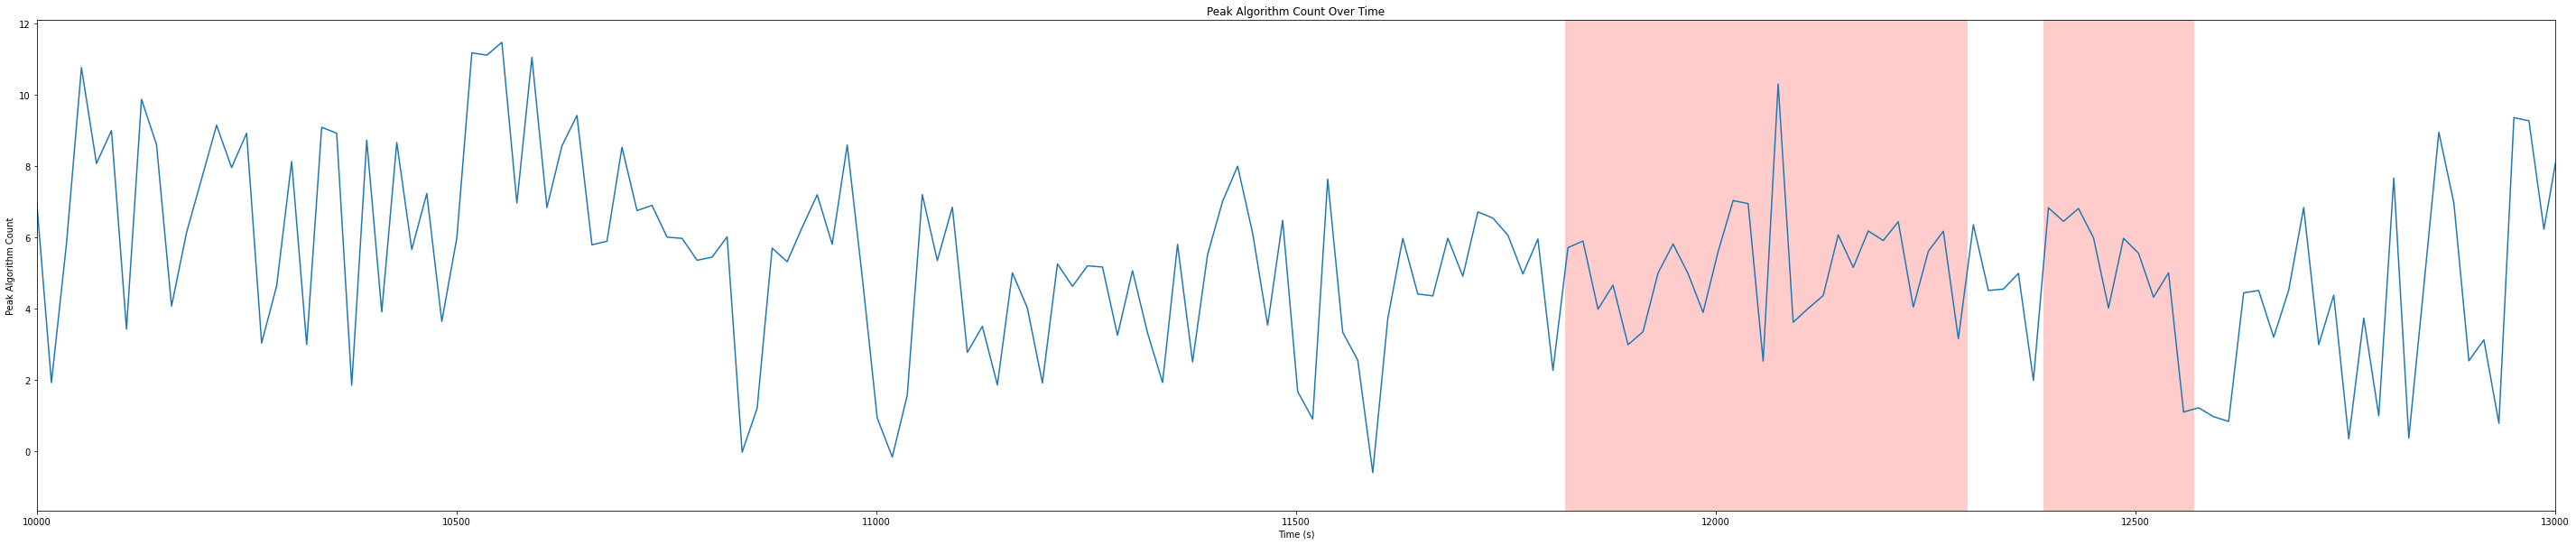

In [14]:
# see only after 10000 seconds

plt.figure(figsize=(50, 10))
plt.plot(xnew, ynew)
plt.xlabel('Time (s)')
plt.ylabel('Peak Algorithm Count')
plt.title('Peak Algorithm Count Over Time')

plt.axvspan(11820, 12300, facecolor='red', alpha=0.2)
plt.axvspan(12390, 12570, facecolor='red', alpha=0.2)
plt.axvspan(17400, 17700, facecolor='red', alpha=0.2)

plt.xlim(10000, 13000)
plt.show()

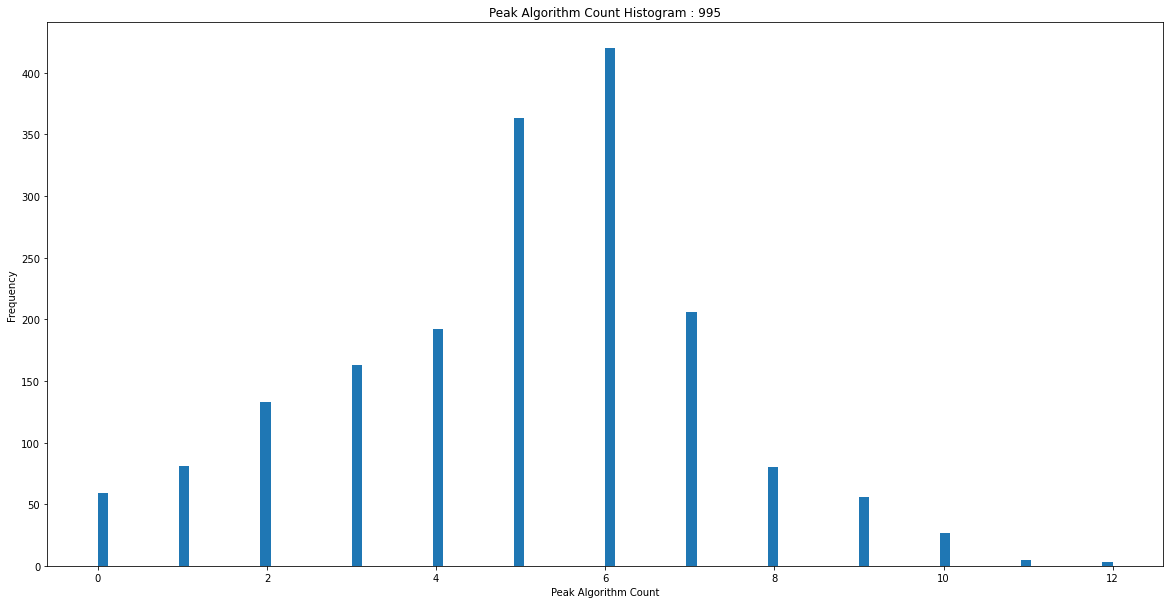

In [15]:
# peak count histogram

plt.figure(figsize=(20, 10))
plt.hist(list_df['peak_algorithm'], bins=100)
plt.xlabel('Peak Algorithm Count')
plt.ylabel('Frequency')
plt.title('Peak Algorithm Count Histogram : 995')

plt.show()